# **SUPPORT VECTOR MACHINE ON DIABETES DATASET**


## **1. Read and check data**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('../data/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# print number of null of each column
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# print data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


| #   | Column                   | Description                                                        | Type  |
| :-- | :----------------------- | :----------------------------------------------------------------- | :---- |
| 1   | Pregnancies              | Number of times pregnant                                           | int   |
| 2   | Glucose                  | Plasma glucose concentration during an oral glucose tolerance test | int   |
| 3   | BloodPressure            | Diastolic blood pressure (mm Hg)                                   | int   |
| 4   | SkinThickness            | Triceps skin fold thickness (mm)                                   | int   |
| 5   | Insulin                  | 2-Hour serum insulin (mu U/ml)                                     | int   |
| 6   | BMI                      | Body mass index (weight in kg/(height in m)^2)                     | float |
| 7   | DiabetesPedigreeFunction | Diabetes pedigree function                                         | float |
| 8   | Age                      | Age (years)                                                        | int   |
| 9   | Outcome                  | Class variable (0 or 1)                                            | int   |


In [7]:
# print all rows have zero value in Glucose, BloodPressure, SkinThickness, Insulin, BMI columns

temp = data[(data['Glucose'] == 0) | (data['BloodPressure'] == 0) | (
    data['SkinThickness'] == 0) | (data['Insulin'] == 0) | (data['BMI'] == 0)]
print(temp.shape)

(376, 9)


- There are no missing values in the dataset. But there are some values that are zero which is not possible. So we will replace those values with the mean of the column later.

## **2. Exploratory Data Analysis**


In [8]:
# make a copy of data
df = data.copy()


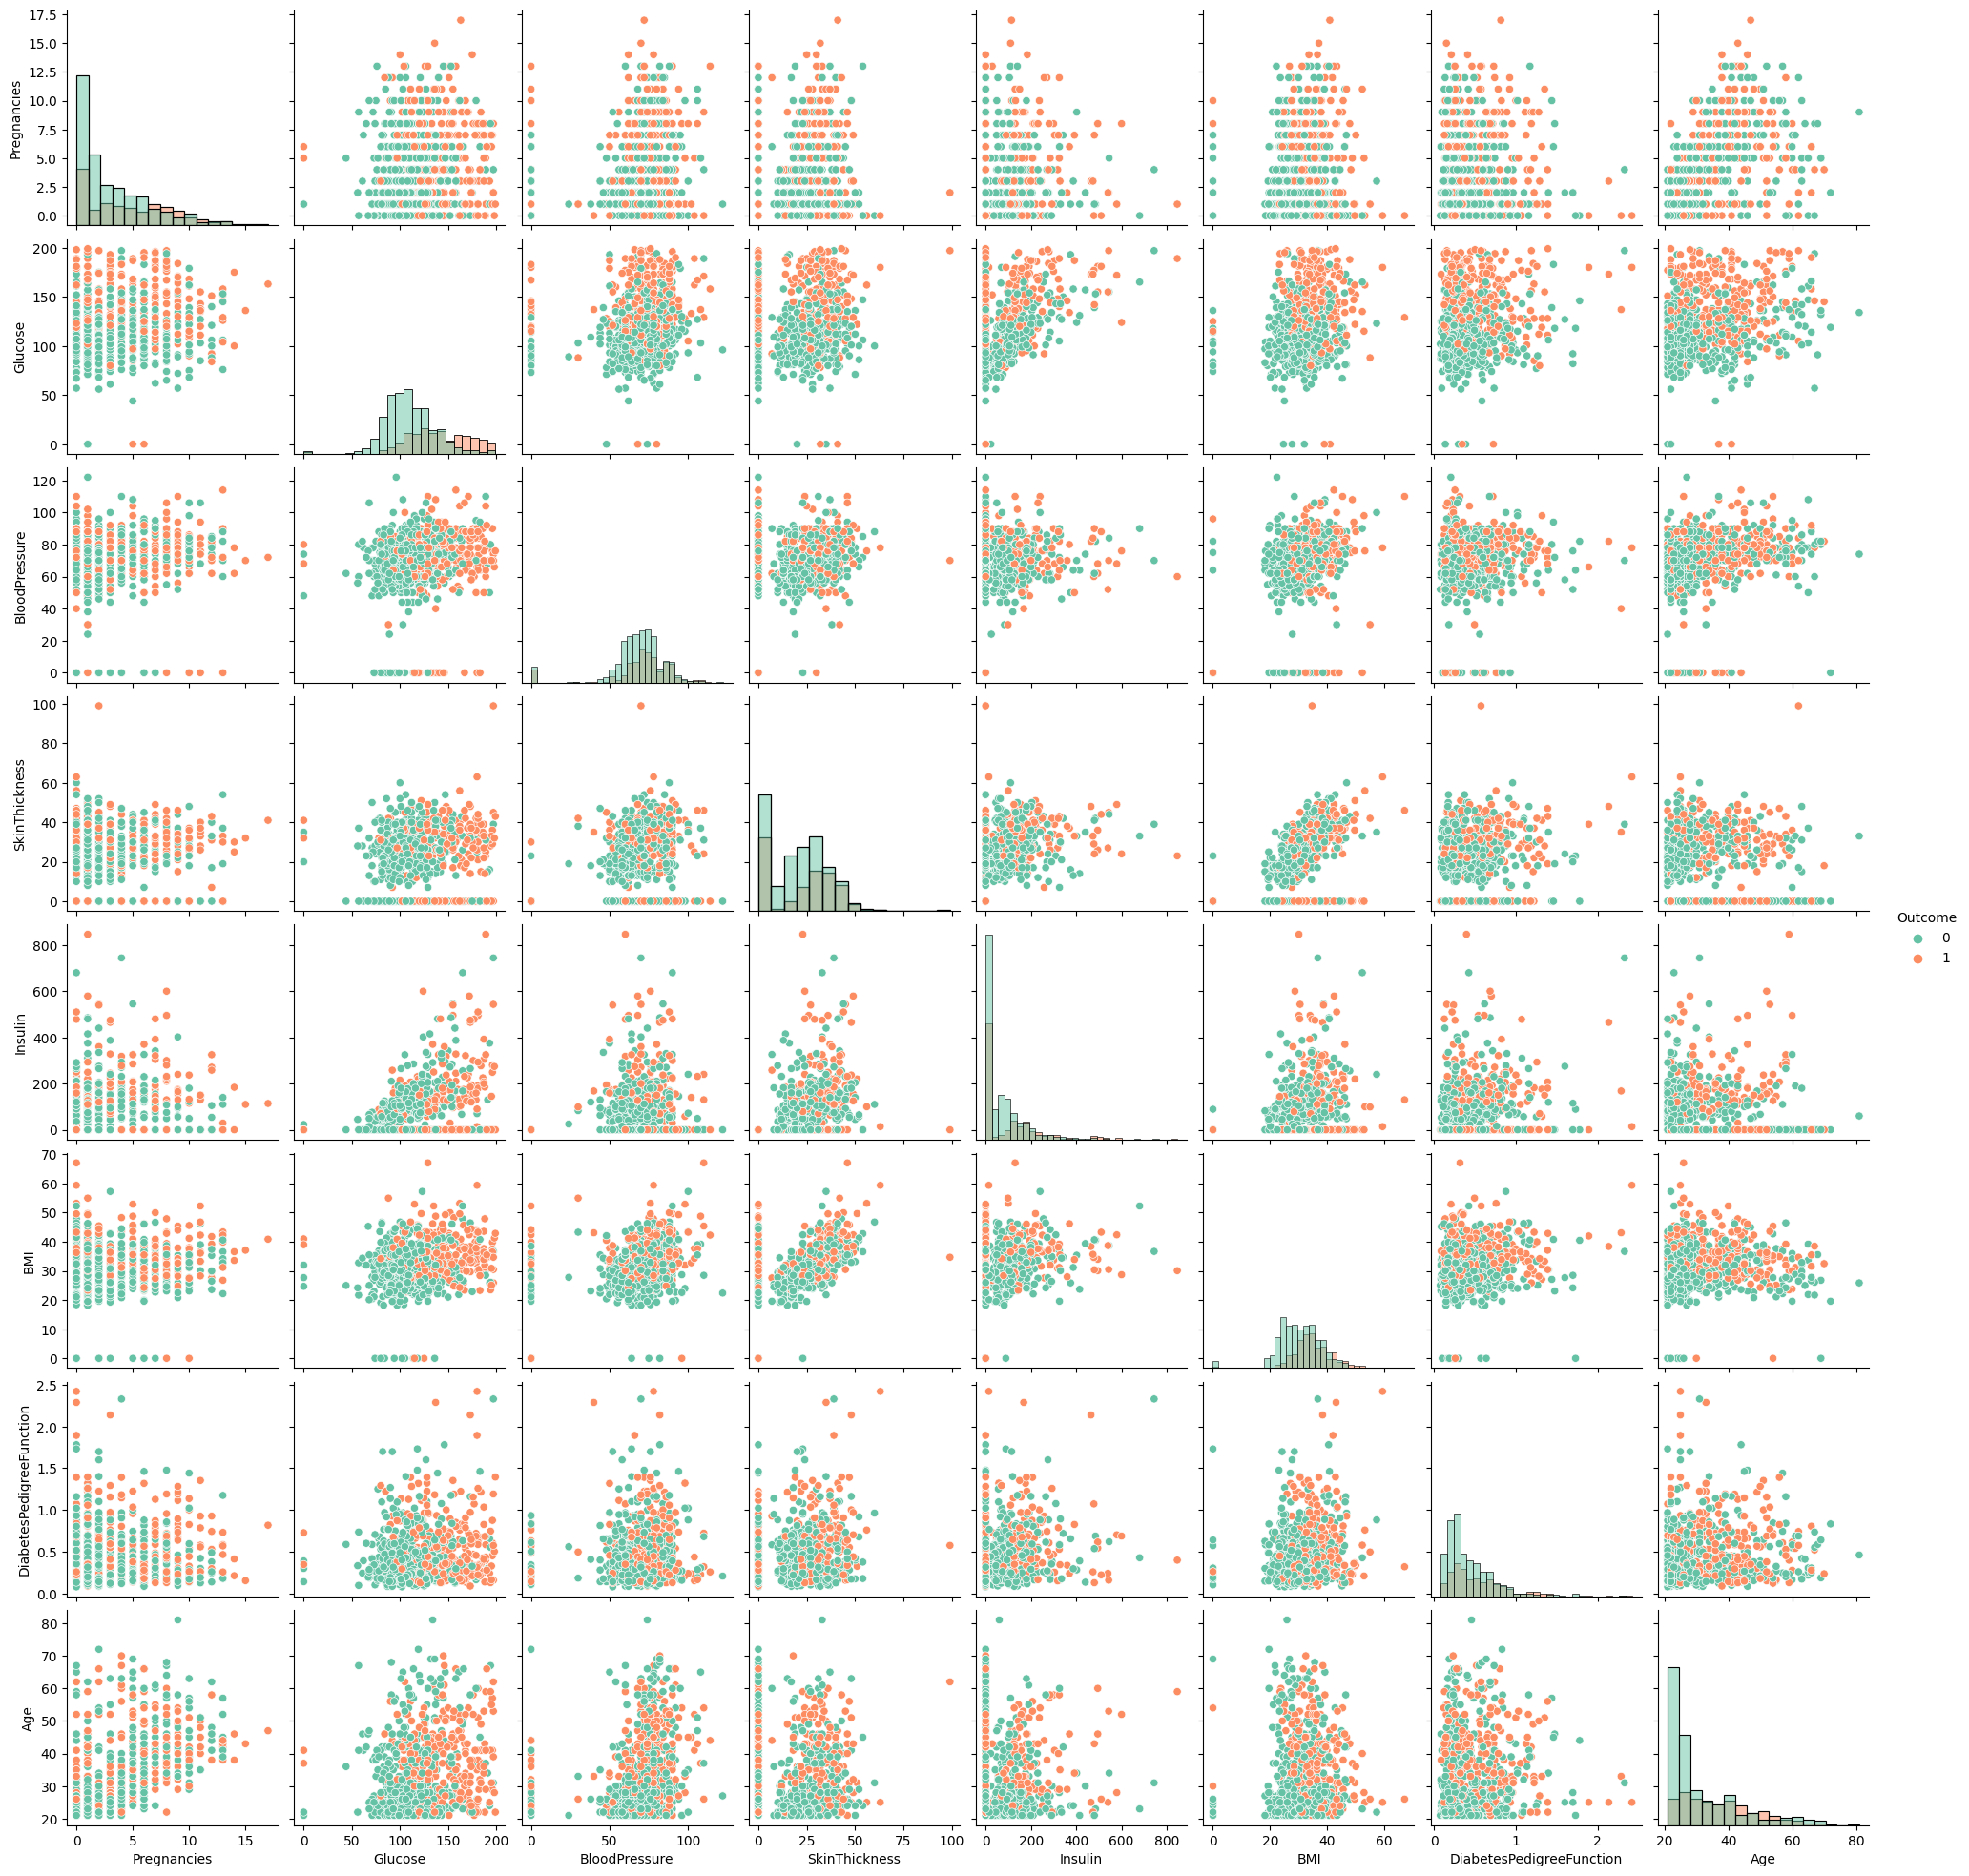

In [9]:
# pairplot
sns.pairplot(df, hue='Outcome', palette='Set2', diag_kind='hist')

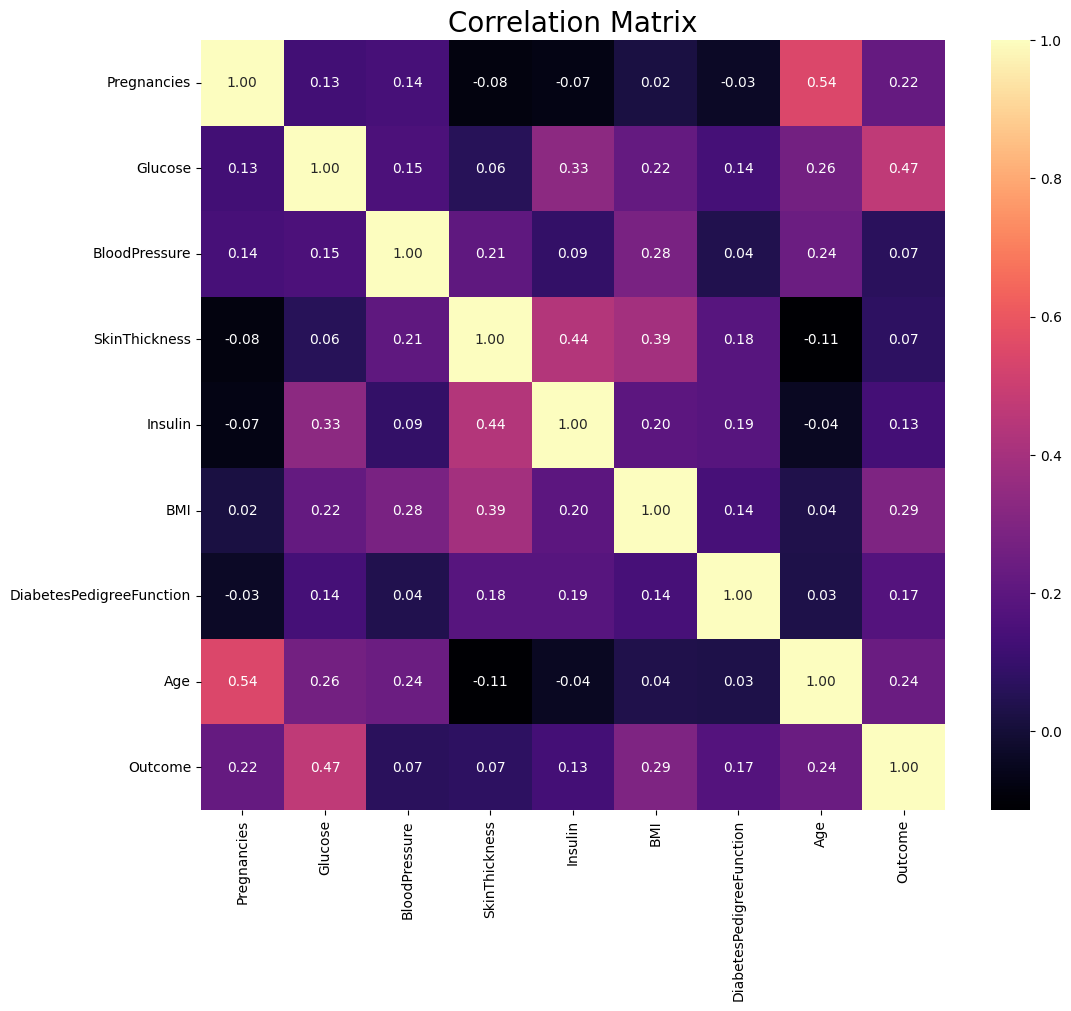

In [12]:
# plot heatmap
f, ax = plt.subplots(figsize=[12, 10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [10]:
def diagnostic_plots(df, variable, target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde=True, color='r')
    plt.title('Histogram')

    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable], df[target], color='g')
    plt.title('Scatterplot')

    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable], color='b')
    plt.title('Boxplot')

    plt.show()

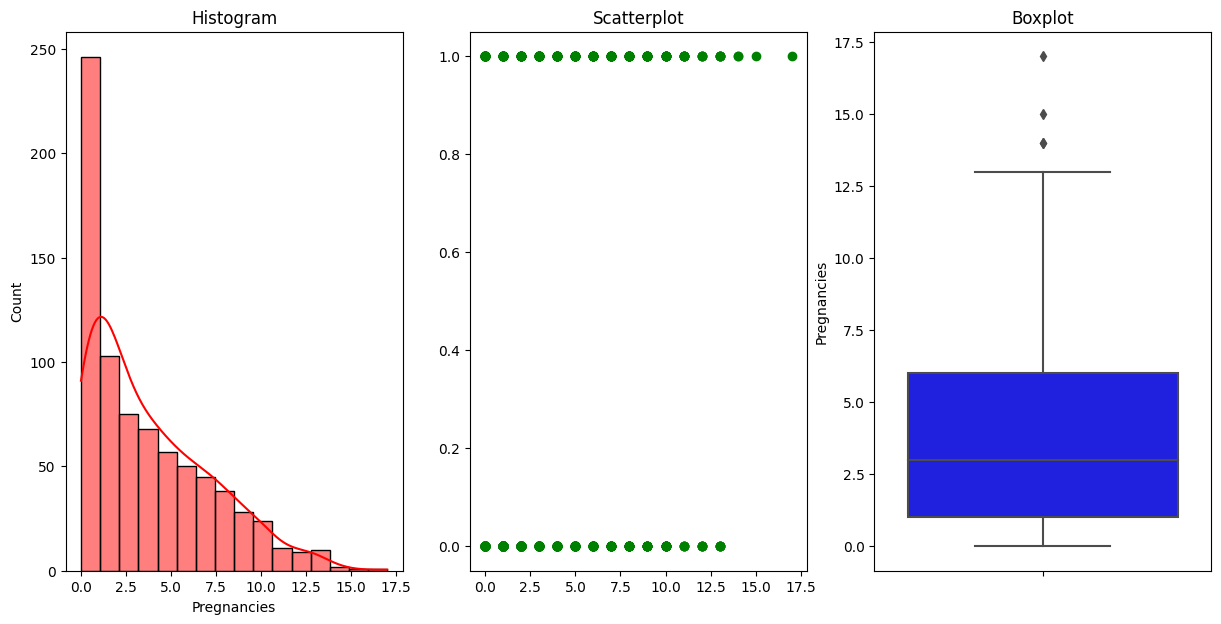

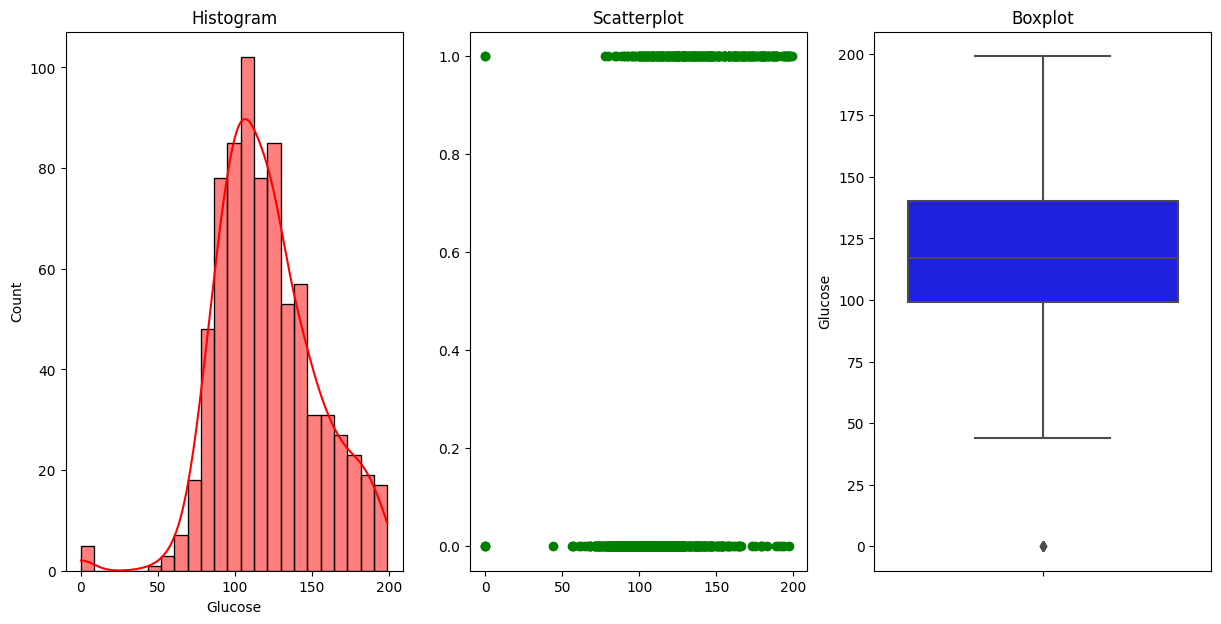

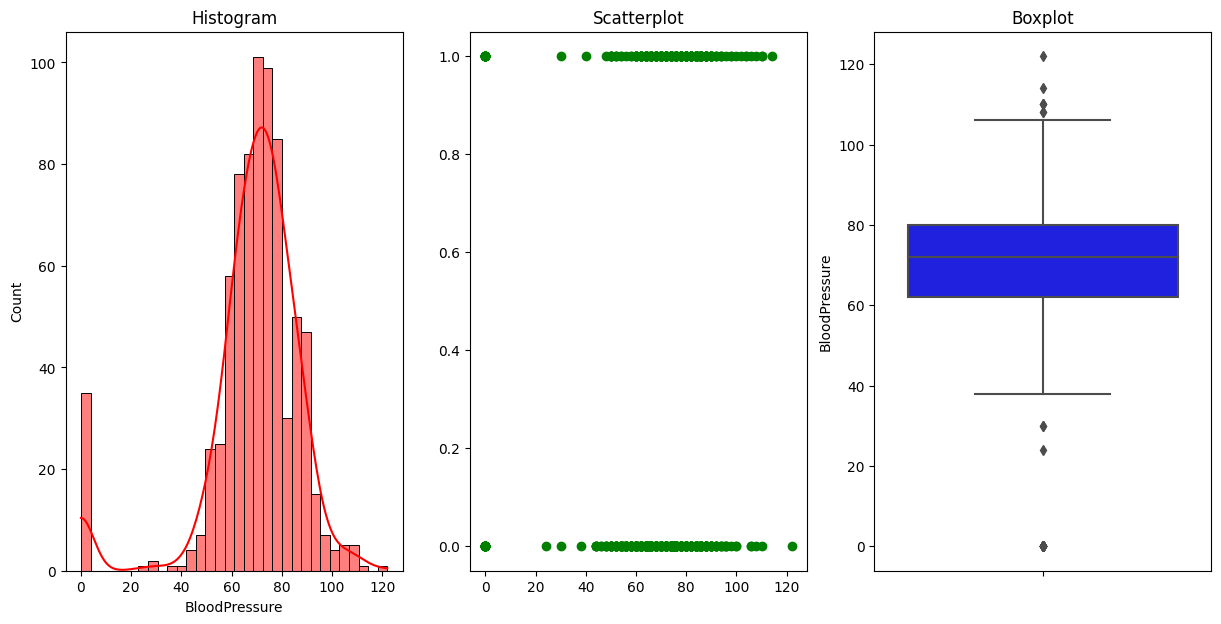

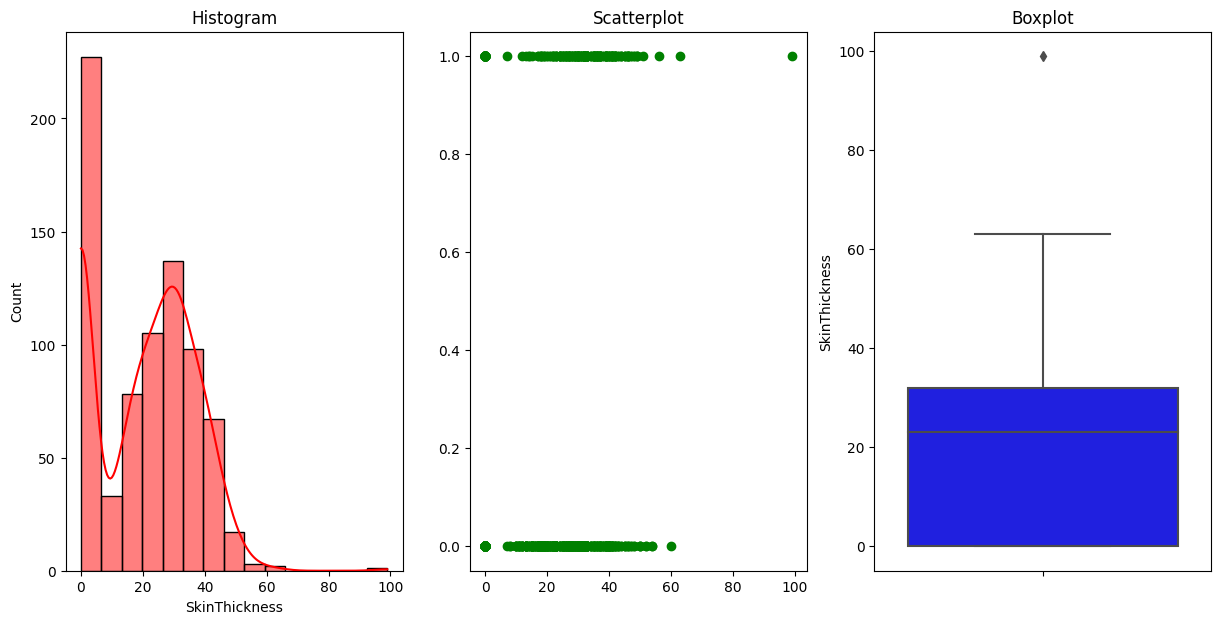

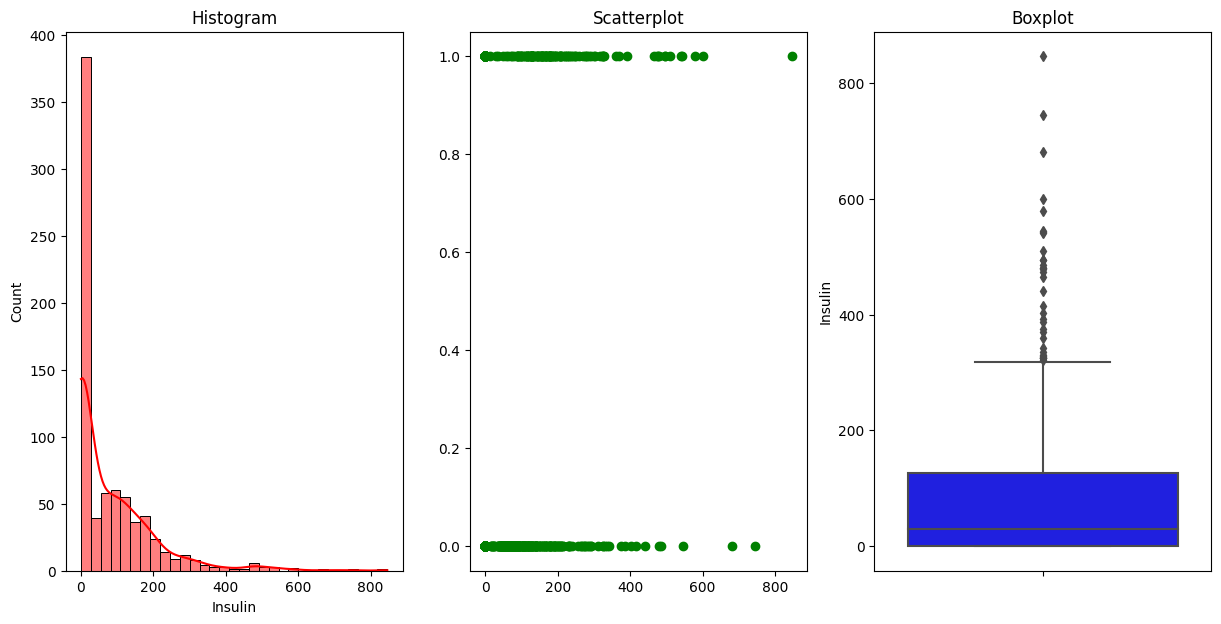

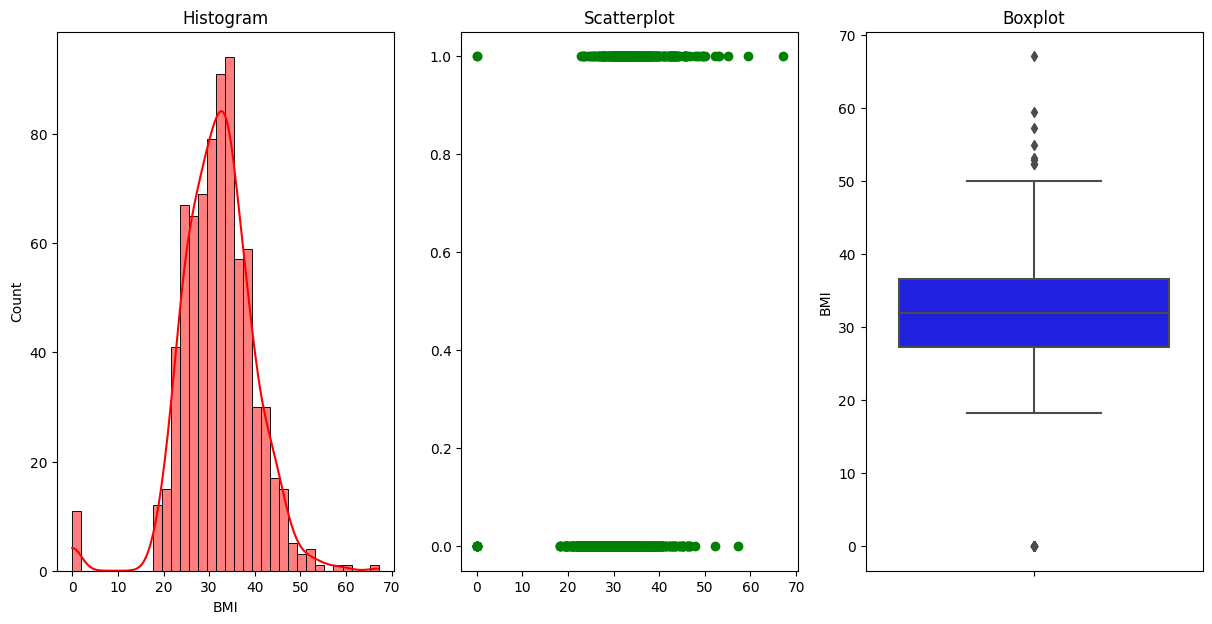

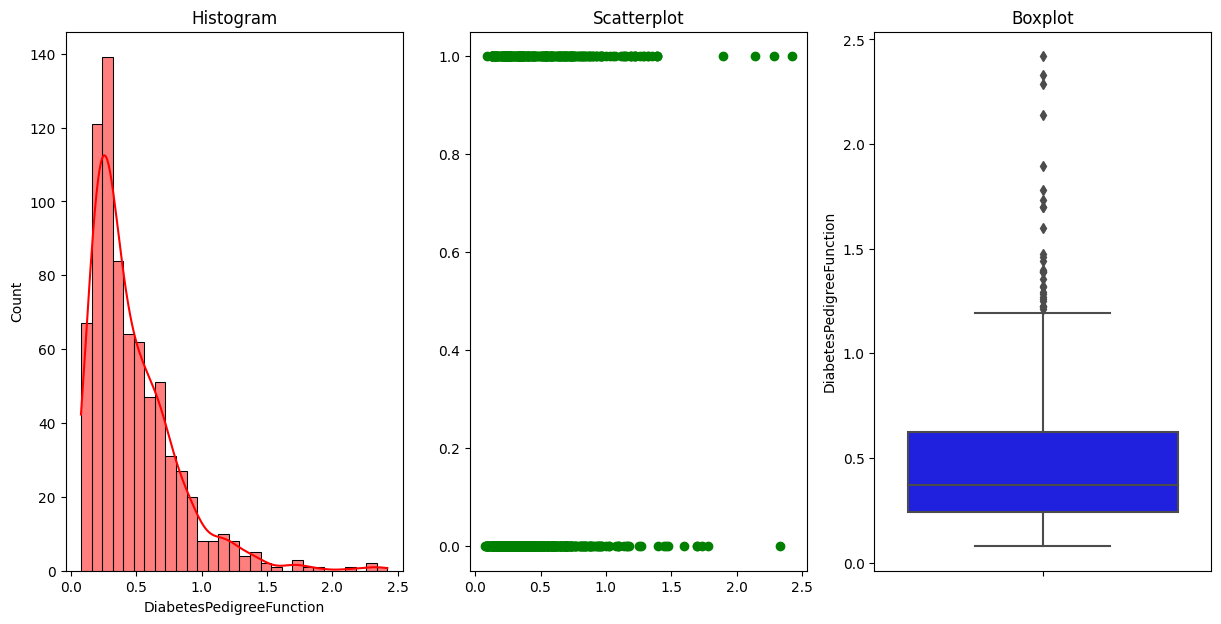

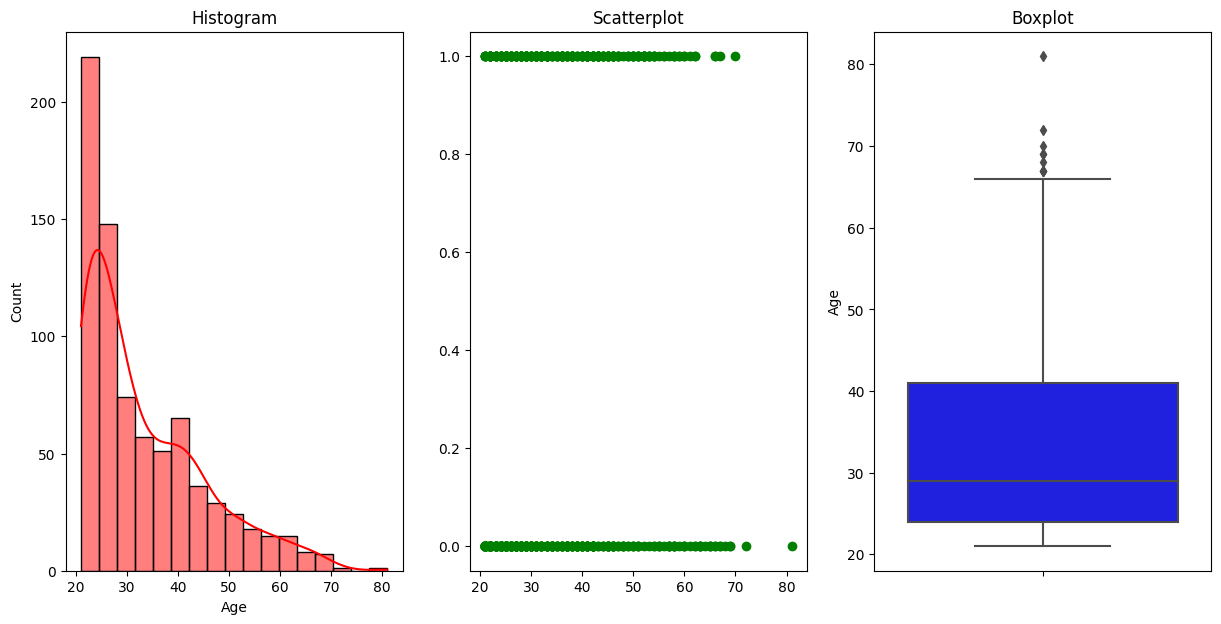

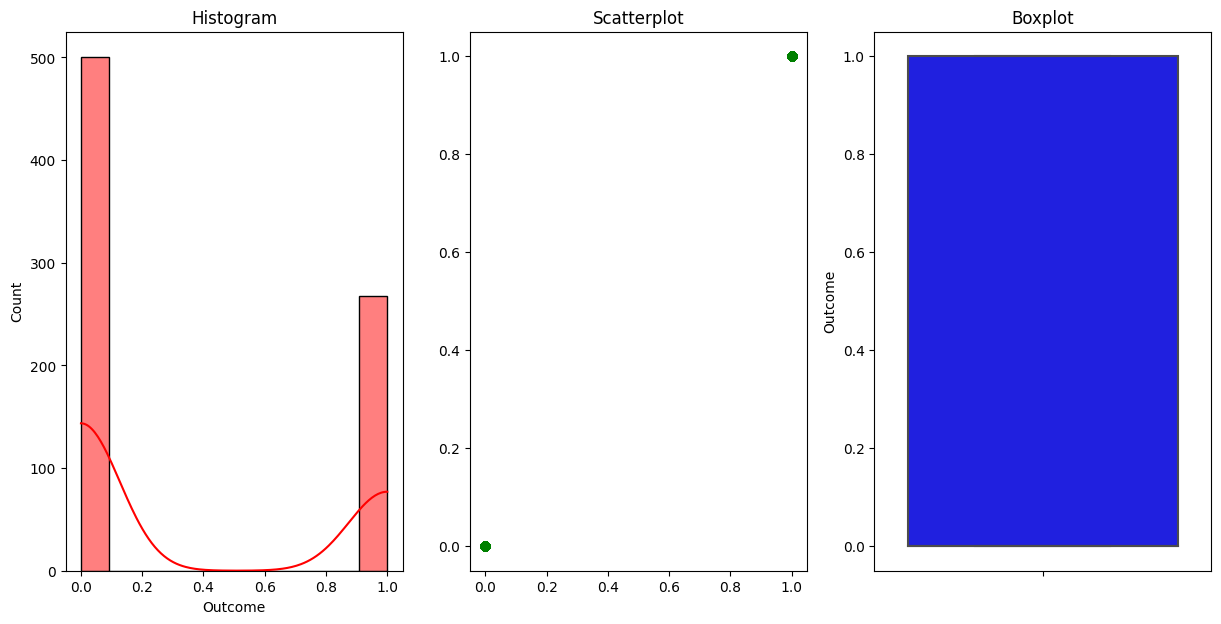

In [11]:
for col in df:
    diagnostic_plots(df, col, 'Outcome')

## **3. Construct pipeline**


In [12]:
# fill zero values in Glucose, BloodPressure, SkinThickness, Insulin, BMI columns with mean value of each column that have the same Outcome value

# calculate mean value of each column that have the same Outcome value and not equal zero
glucose_not_zero = data[data['Glucose'] != 0]
glucose_mean = glucose_not_zero.groupby('Outcome')['Glucose'].mean()

blood_pressure_not_zero = data[data['BloodPressure'] != 0]
blood_pressure_mean = blood_pressure_not_zero.groupby('Outcome')[
    'BloodPressure'].mean()

skin_thickness_not_zero = data[data['SkinThickness'] != 0]
skin_thickness_mean = data.groupby('Outcome')['SkinThickness'].mean()

insulin_not_zero = data[data['Insulin'] != 0]
insulin_mean = data.groupby('Outcome')['Insulin'].mean()

bmi_not_zero = data[data['BMI'] != 0]
bmi_mean = data.groupby('Outcome')['BMI'].mean()

# fill zero values by mean value of each column that have the same Outcome value
data.loc[(data['Outcome'] == 0) & (data['Glucose'] == 0),
         'Glucose'] = glucose_mean[0]
data.loc[(data['Outcome'] == 1) & (data['Glucose'] == 0),
         'Glucose'] = glucose_mean[1]

data.loc[(data['Outcome'] == 0) & (data['BloodPressure'] == 0),
         'BloodPressure'] = blood_pressure_mean[0]
data.loc[(data['Outcome'] == 1) & (data['BloodPressure'] == 0),
         'BloodPressure'] = blood_pressure_mean[1]

data.loc[(data['Outcome'] == 0) & (data['SkinThickness'] == 0),
         'SkinThickness'] = skin_thickness_mean[0]
data.loc[(data['Outcome'] == 1) & (data['SkinThickness'] == 0),
         'SkinThickness'] = skin_thickness_mean[1]

data.loc[(data['Outcome'] == 0) & (data['Insulin'] == 0),
         'Insulin'] = insulin_mean[0]
data.loc[(data['Outcome'] == 1) & (data['Insulin'] == 0),
         'Insulin'] = insulin_mean[1]

data.loc[(data['Outcome'] == 0) & (data['BMI'] == 0), 'BMI'] = bmi_mean[0]
data.loc[(data['Outcome'] == 1) & (data['BMI'] == 0), 'BMI'] = bmi_mean[1]

In [13]:
# train test split
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)


In [14]:
# class to handle outliers
from sklearn.base import BaseEstimator, TransformerMixin


class Skew_Outlier(BaseEstimator, TransformerMixin):
    def fit(self, X: pd.DataFrame, y=None):
        self.cols = X.columns
        self.upper_bound = {}
        self.lower_bound = {}
        for col in self.cols:
            q1, q3 = np.percentile(X[col], [25, 75])
            IQR = q3 - q1
            self.upper_bound[col] = q3 + 1.5 * IQR
            self.lower_bound[col] = q1 - 1.5 * IQR
        return self

    def transform(self, X: pd.DataFrame, y=None):
        for col in self.cols:
            X.loc[X[col] > self.upper_bound[col], col] = self.upper_bound[col]
            X.loc[X[col] < self.lower_bound[col], col] = self.lower_bound[col]
        return X


class Normal_Outlier(BaseEstimator, TransformerMixin):

    def fit(self, X: pd.DataFrame, y=None):
        self.cols = X.columns
        self.upper_bound = {}
        self.lower_bound = {}
        for col in self.cols:
            self.upper_bound[col] = np.mean(X[col]) + 3 * np.std(X[col])
            self.lower_bound[col] = np.mean(X[col]) - 3 * np.std(X[col])
        return self

    def transform(self, X: pd.DataFrame, y=None):
        for col in self.cols:
            X.loc[X[col] > self.upper_bound[col], col] = self.upper_bound[col]
            X.loc[X[col] < self.lower_bound[col], col] = self.lower_bound[col]
        return X

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer

normal_dist_cols = ['Glucose', 'BloodPressure', 'BMI']
skew_dist_cols = ['Pregnancies', 'SkinThickness',
                  'Insulin', 'DiabetesPedigreeFunction', 'Age']

pipeline1 = Pipeline([
    ('normal', Normal_Outlier()),
    ('scaler', MinMaxScaler())
])

pipeline2 = Pipeline([
    ('skew', Skew_Outlier()),
    ('scaler', MinMaxScaler())
    
])
preprocessor = ColumnTransformer([
    ('normal', pipeline1, normal_dist_cols),
    ('skew', pipeline2, skew_dist_cols),
])

In [16]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [17]:
X_train = pd.DataFrame(X_train, columns=X.columns)
train_set = pd.concat([X_train, y_train], axis=1)


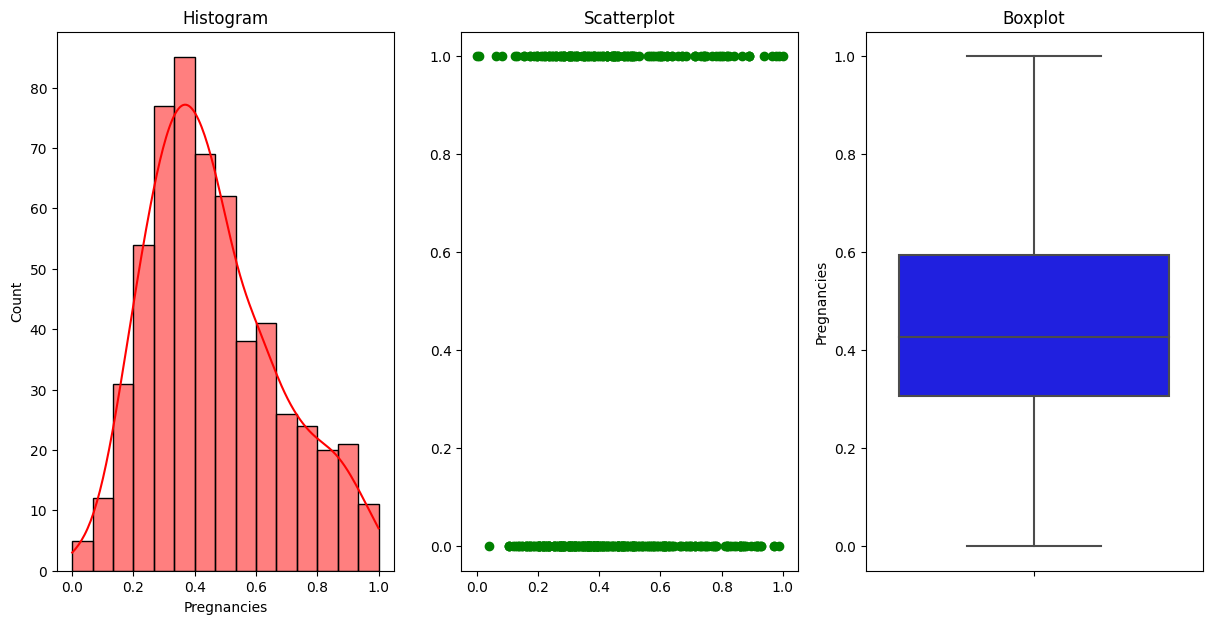

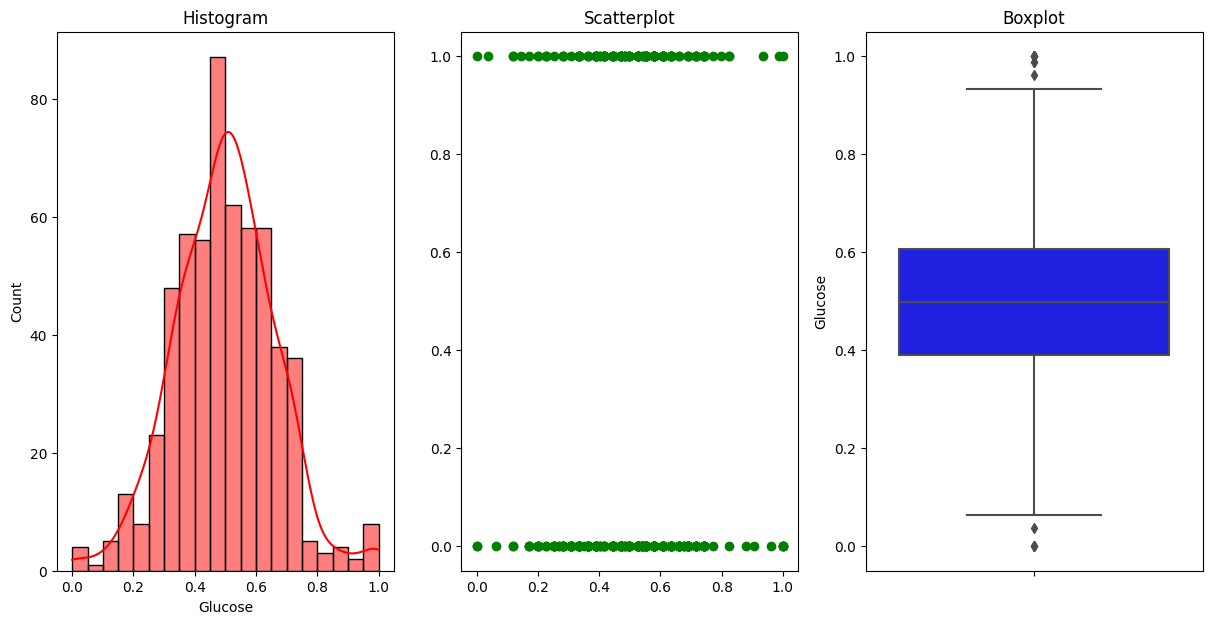

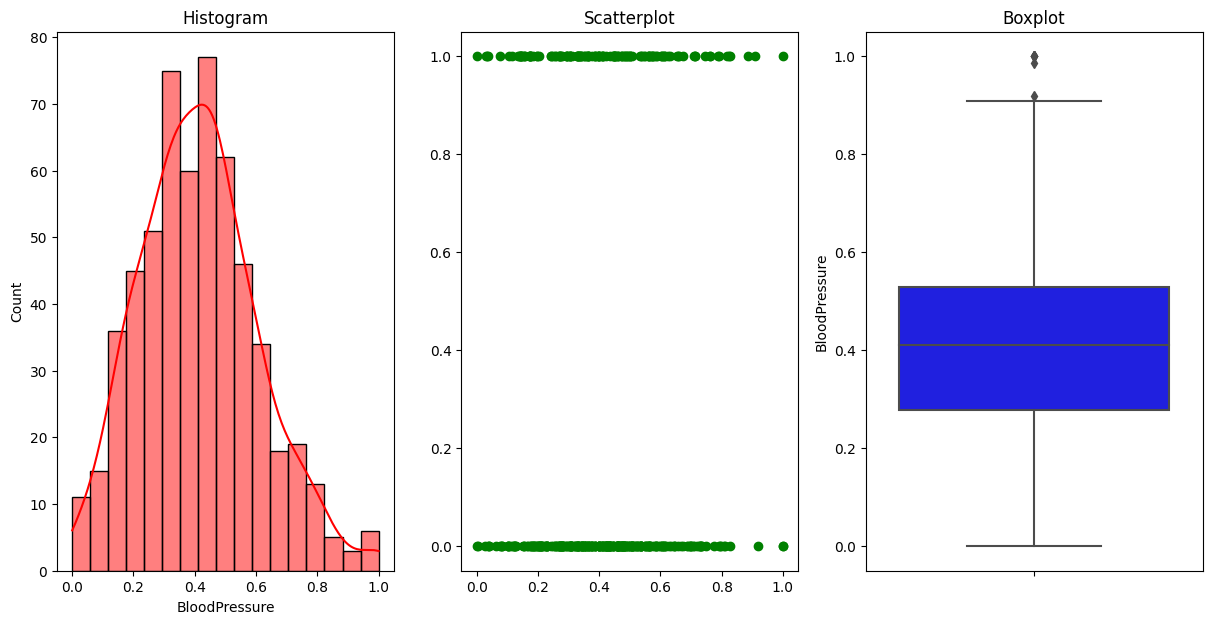

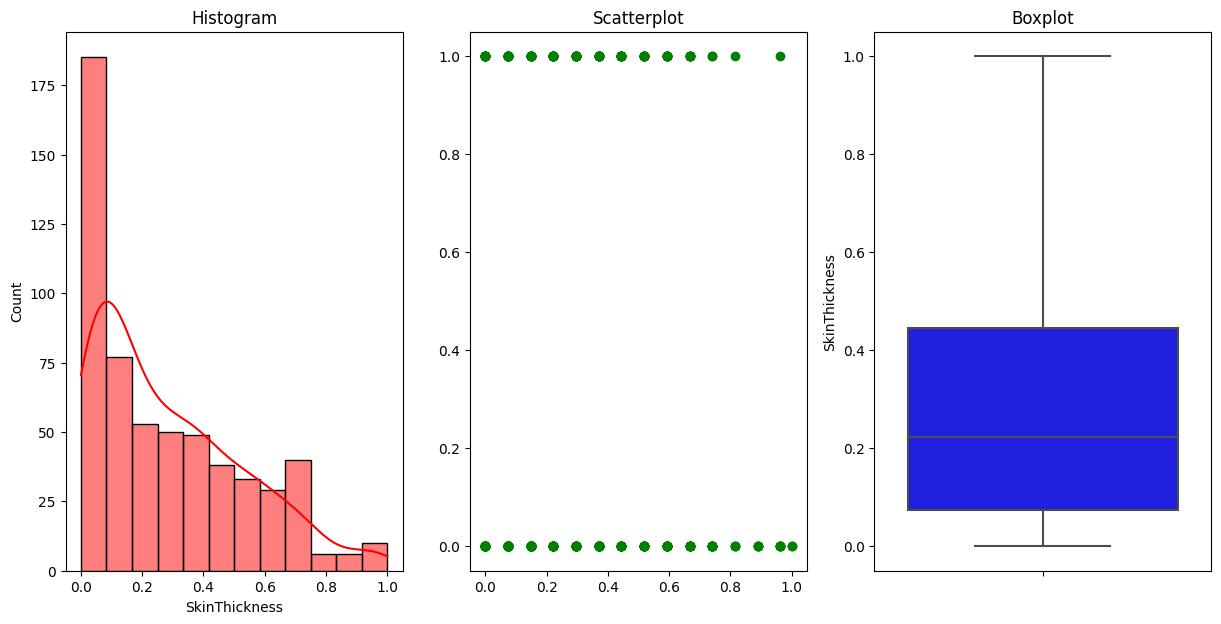

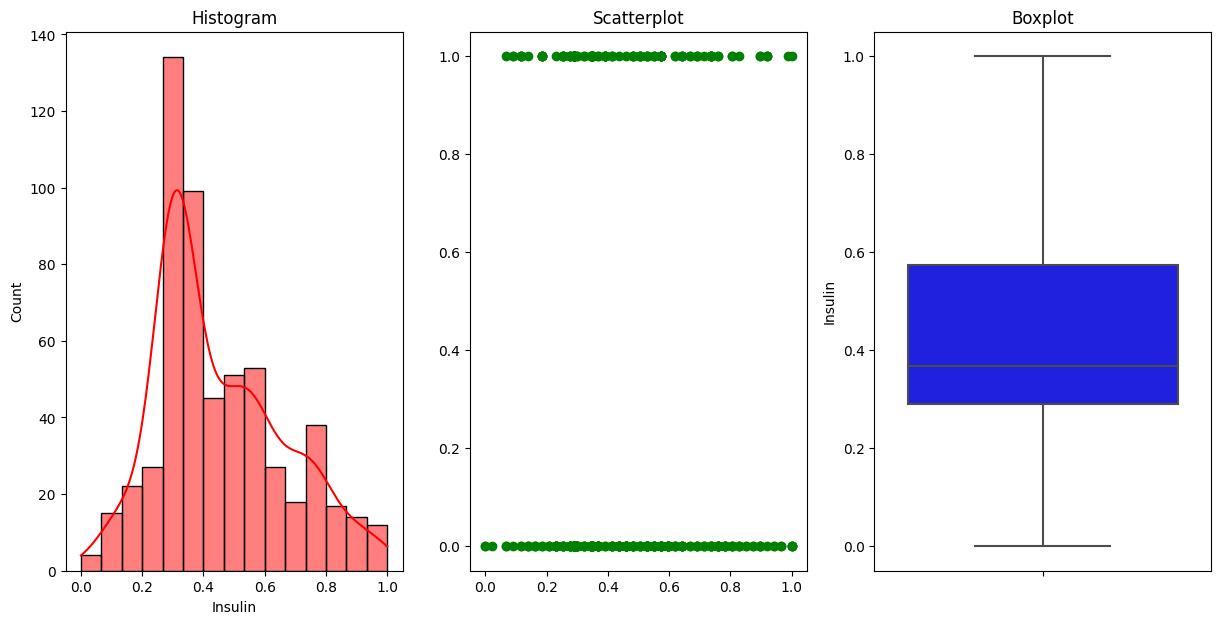

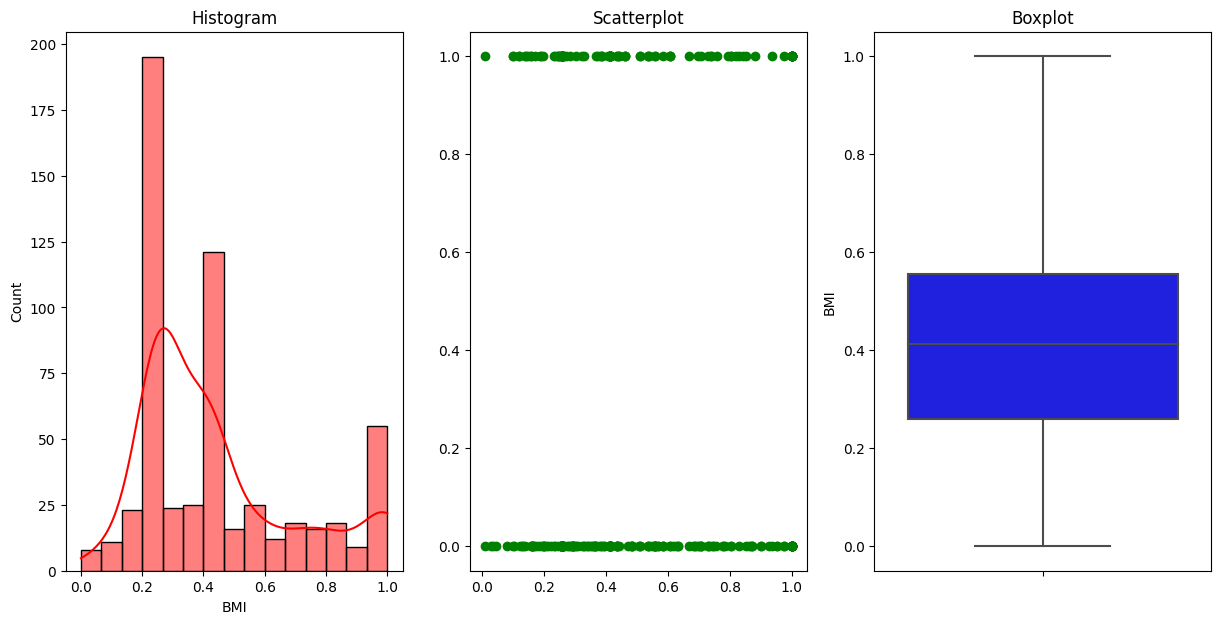

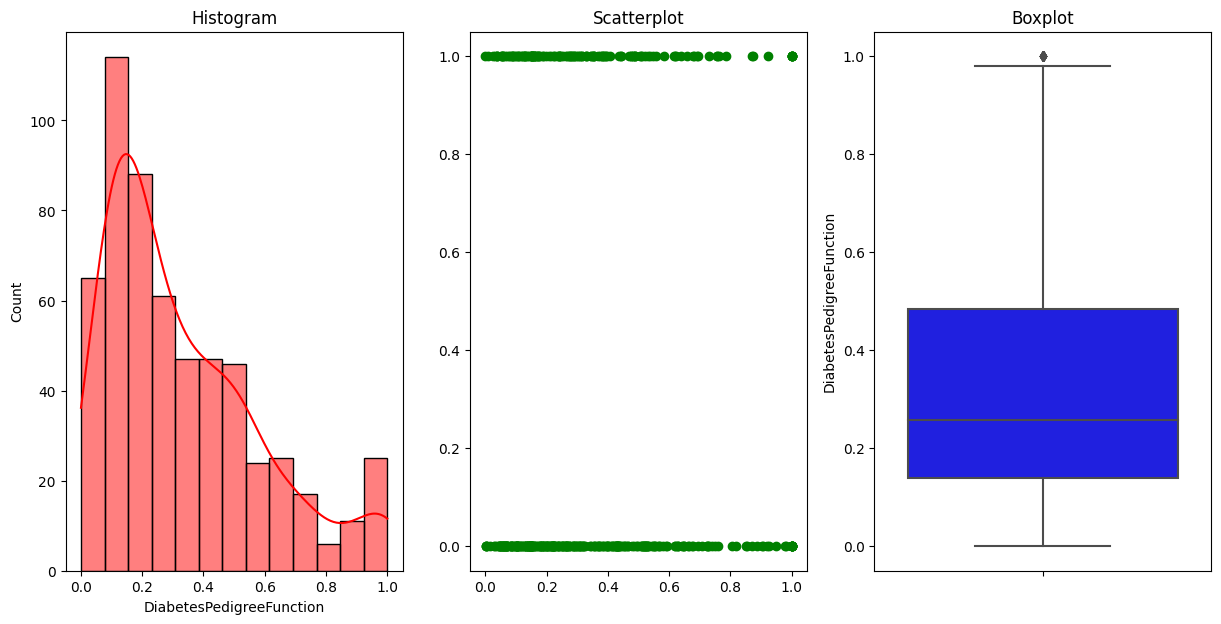

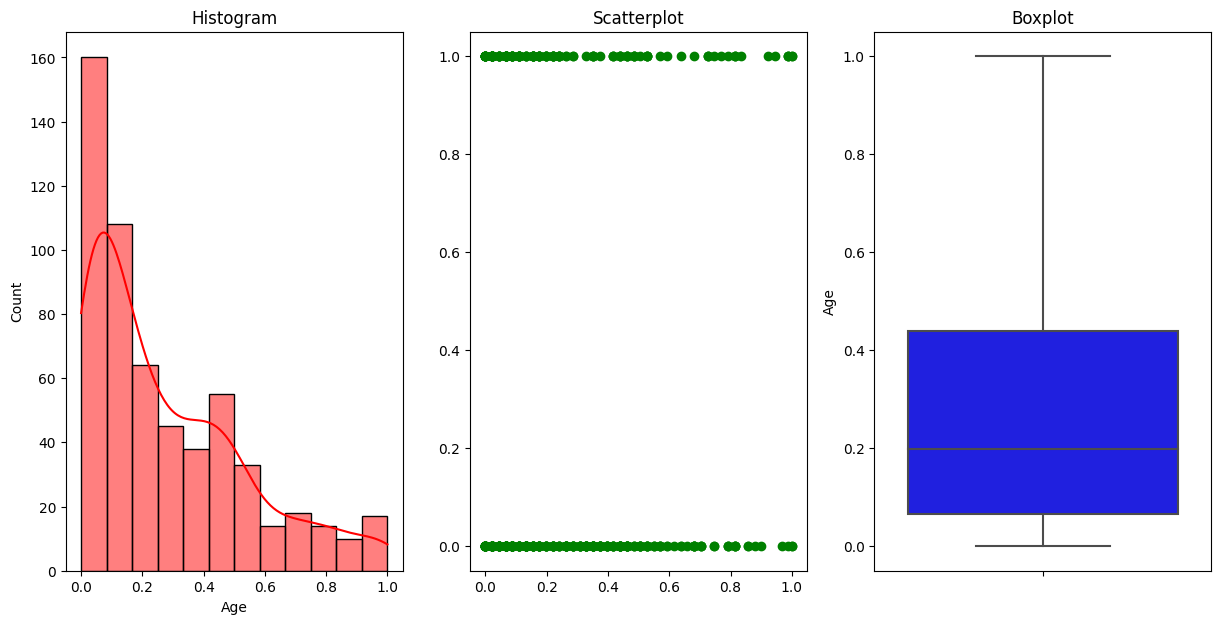

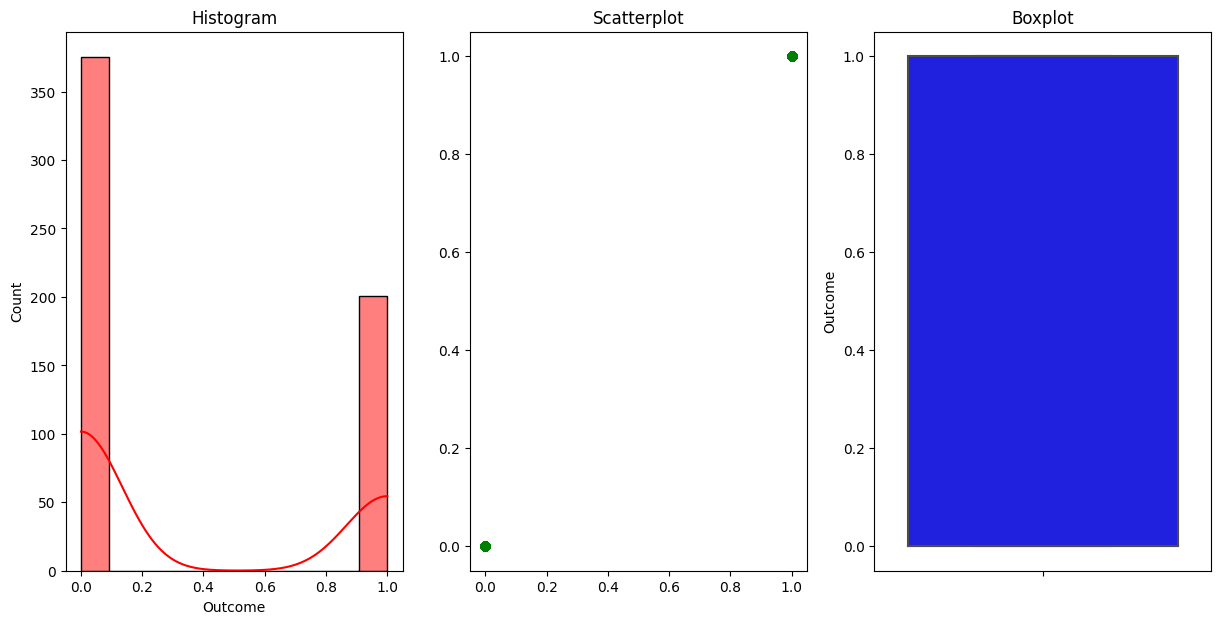

In [18]:
for col in train_set:
    diagnostic_plots(train_set, col, 'Outcome')

## **4. Test model**


### **Test original model**


In [19]:
from sklearn.metrics import classification_report
# Test logistic regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_test)
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       125
           1       0.69      0.55      0.61        67

    accuracy                           0.76       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.75      0.76      0.75       192



In [20]:
# Test support vector machine
svm = SVC()
svm.fit(X_train, y_train)
svm.predict(X_test)
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       125
           1       0.74      0.63      0.68        67

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.79       192



### **Test with cross validation**


In [21]:
def display_scores(scores):
    print("Accuracy:", scores)
    print("Mean accuracy:", scores.mean())
    print("Standard deviation:", scores.std())


In [22]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, X_train, y_train, scoring="accuracy", cv=10)
display_scores(lr_scores)


Accuracy: [0.82758621 0.72413793 0.75862069 0.74137931 0.81034483 0.79310345
 0.77192982 0.73684211 0.8245614  0.78947368]
Mean accuracy: 0.7777979431336963
Standard deviation: 0.035186460143953276


In [23]:
svm_scores = cross_val_score(svm, X_train, y_train, scoring="accuracy", cv=10)
display_scores(svm_scores)


Accuracy: [0.86206897 0.75862069 0.81034483 0.82758621 0.86206897 0.81034483
 0.89473684 0.84210526 0.78947368 0.8245614 ]
Mean accuracy: 0.8281911675741076
Standard deviation: 0.037292035374956366


## **5. Hyperparameter Tuning**


### **Logistic Regression**


In [24]:
C = [0.1, 1, 10, 100, 1000]
penalty = ['l1', 'l2', 'elasticnet', 'none']

lr_params = {
    'C': C,
    'penalty': penalty
}

In [25]:
from sklearn.model_selection import GridSearchCV

lr_search = GridSearchCV(
    lr, lr_params, scoring='accuracy', verbose=1, n_jobs=-1, cv=5)
lr_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy', verbose=1)

In [26]:
print(lr_search.best_params_)
print("Best recall of positive class: ", lr_search.best_score_)

{'C': 0.1, 'penalty': 'none'}
Best recall of positive class:  0.7830284857571215


### **Support Vector Machine**


In [27]:
from sklearn.model_selection import RandomizedSearchCV

C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

param_grid = [
    {'C': C, 'kernel': ['linear']},
    {'C': C, 'gamma': gamma, 'kernel': ['rbf']},
    {'C': C, 'gamma': gamma, 'kernel': ['poly']},
]

svm_search = RandomizedSearchCV(
    svm, param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=5)
svm_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions=[{'C': [0.1, 1, 10, 100, 1000],
                                         'kernel': ['linear']},
                                        {'C': [0.1, 1, 10, 100, 1000],
                                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                         'kernel': ['rbf']},
                                        {'C': [0.1, 1, 10, 100, 1000],
                                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                         'kernel': ['poly']}],
                   scoring='accuracy', verbose=1)

In [28]:
print(svm_search.best_params_)
print("Best recall of positive class: ", svm_search.best_score_)

{'kernel': 'rbf', 'gamma': 1, 'C': 100}
Best recall of positive class:  0.8281559220389806


## **6. Evaluate model**


### **Logistic Regression**


In [29]:
lr_final = lr_search.best_estimator_
lr_final.fit(X_train, y_train)
lr_final.predict(X_test)
print(classification_report(y_test, lr_final.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       125
           1       0.64      0.55      0.59        67

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



<Axes: >

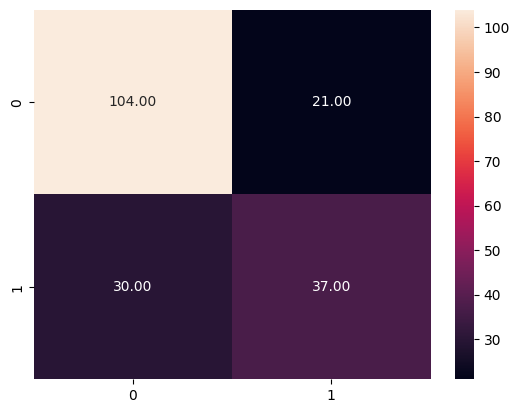

In [30]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, lr_final.predict(X_test)),
            annot=True, fmt='.2f')


### **Support Vector Machine**


In [31]:
svm_final = svm_search.best_estimator_
svm_final.fit(X_train, y_train)
svm_final.predict(X_test)
print(classification_report(y_test, svm_final.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       125
           1       0.75      0.67      0.71        67

    accuracy                           0.81       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.80      0.81      0.80       192



<Axes: >

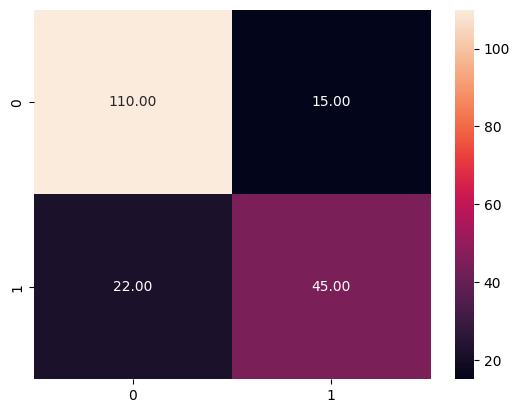

In [32]:
sns.heatmap(confusion_matrix(y_test, svm_final.predict(X_test)),
            annot=True, fmt='.2f')
